# Infomation about this project :
- This project is a competition in kaggle about use machine learning to create a model that predicts which passengers survived the Titanic shipwreck : https://www.kaggle.com/c/titanic
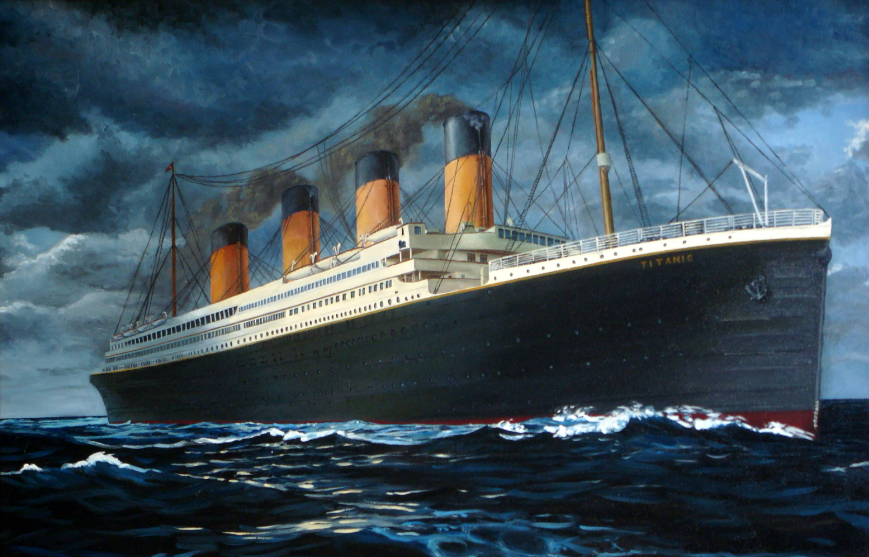

- The sinking of the Titanic is one of the most infamous shipwrecks in history.

- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
# 1.Problem Definition 
- This is a binary classification problem, meaning we will build a model to predict whether passengers on the ship survived or not during the disaster(0 = No, 1 = yes).
# 2.What data do we have ??
- The data is download from kaggle, we have two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv 

- Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

- The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. And out target is to predict these outcomes using the patterns that the model find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## DATA DICTIONARY

1.survival            : 0 = No, 1 = Yes

2.pclass(Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd (1st = Upper,2nd = Middle,3rd = Lower)

3.sex(Sex)            : male,female

4.Age                 :Age in years

5.sibsp	              :# of siblings / spouses aboard the Titanic

- The dataset defines family relations in this way...
     - Sibling = brother, sister, stepbrother, stepsister
     - Spouse = husband, wife (mistresses and fiancés were ignored)

6.parch	              :# of parents / children aboard the Titanic

- The dataset defines family relations in this way...
     - Parent = mother, father
     - Child = daughter, son, stepdaughter, stepson
     - Some children travelled only with a nanny, therefore parch=0 for them.

7.ticket	          :Ticket number

8.fare	              :Passenger fare

9.cabin	              :Cabin number

10.embarked	          :Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Evaluation 
- As with any classification problem, I will focus on Accuracy, but I will still use other metrics during the project.

# Tools 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the data

In [139]:
# Checking both train and test dataset 
df_train = pd.read_csv("train.csv")

In [115]:
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.shape,df_test.shape

((891, 12), (418, 11))

Let use the train_df from now

In [10]:
#Check the dataset have any numeric data type
for label,content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [12]:
#How about non numeric data type???
for label,content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [13]:
#Check for any null data in both dataset
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Let find out a little bit about the dataset.

In [18]:
#Find the rate of a people to survived on the boat
len(df_train[df_train["Survived"] == 1]) / len(df_train) * 100

38.38383838383838

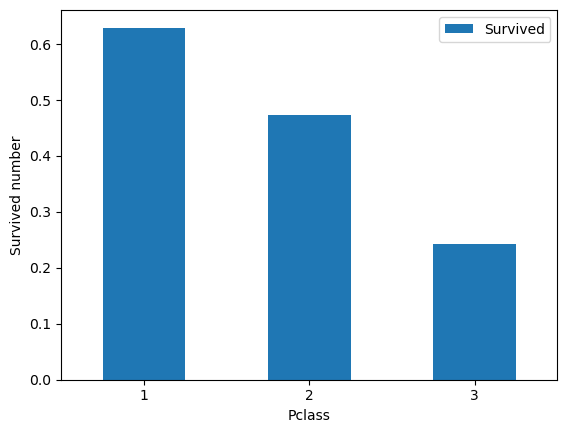

In [23]:
#Let plot the pclass columns with the survived columns to find the correlation between them 
df_train[['Pclass','Survived']].groupby(["Pclass"]).mean().sort_values(by="Survived",ascending=False).plot(kind = "bar")
plt.xticks(rotation = True);
plt.ylabel("Survived number");

Look like the people on the 1 ticket class get higher chance to survived the shipwreak than the others.

Let find out more

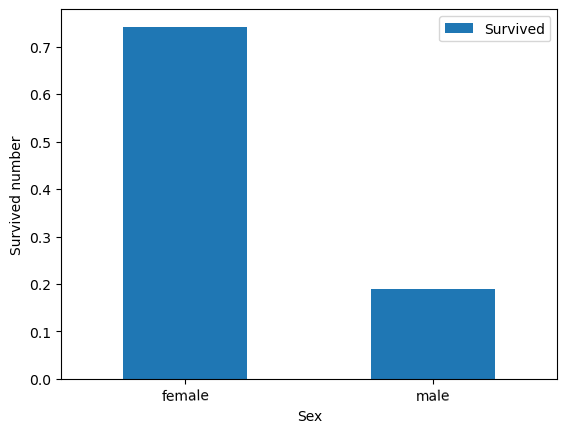

In [39]:
#Regarding the sex, is there any correlation with survival?, let plot them together
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False).plot(kind = "bar")
plt.xticks(rotation = True);
plt.ylabel("Survived number");

In [33]:
#Let Head to the SibSp and Parch
df_train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [42]:
#Proportion of passenger travel with their siblings
len(df_train[df_train["SibSp"]  >= 1 ]) / len(df_train) * 100

31.762065095398427

In [43]:
#Proportion of passenger travel with out their siblings (Alone)
len(df_train[df_train["SibSp"]  == 0 ]) / len(df_train) * 100

68.23793490460157

In [37]:
df_train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [44]:
#Proportion of passenger travel with their family(parent and child)
len(df_train[df_train["Parch"]  >= 1 ]) / len(df_train) * 100

23.905723905723907

In [45]:
#Proportion of passenger travel with out their family(parent and child)
len(df_train[df_train["Parch"]  == 0 ]) / len(df_train) * 100 

76.0942760942761

Both indicators indicate passengers without family members, so why does the 'parch' variable seem to have more instances than 'SibSp'? The reason may be that there were babies traveling with nannies, while 'SibSp' doesn't seem to address this issue

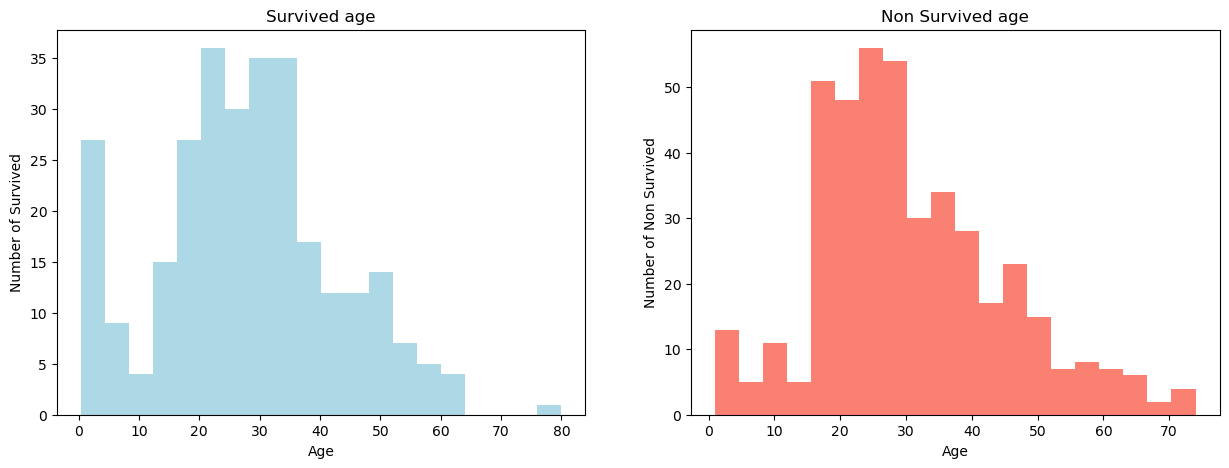

In [46]:
#Let find the corelation between age and survived
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (15,5))
hist1 = ax1.hist(df_train.Age[df_train.Survived == 1],bins= 20,color="lightblue")
hist2 = ax2.hist(df_train.Age[df_train.Survived == 0],bins= 20,color="salmon")
ax1.set(title="Survived age",xlabel="Age",ylabel="Number of Survived")
ax2.set(title="Non Survived age",xlabel="Age",ylabel="Number of Non Survived");

The two charts seem to lack clarity and may not convey much meaning. Let's add 'pclass' to see if it provides additional insights

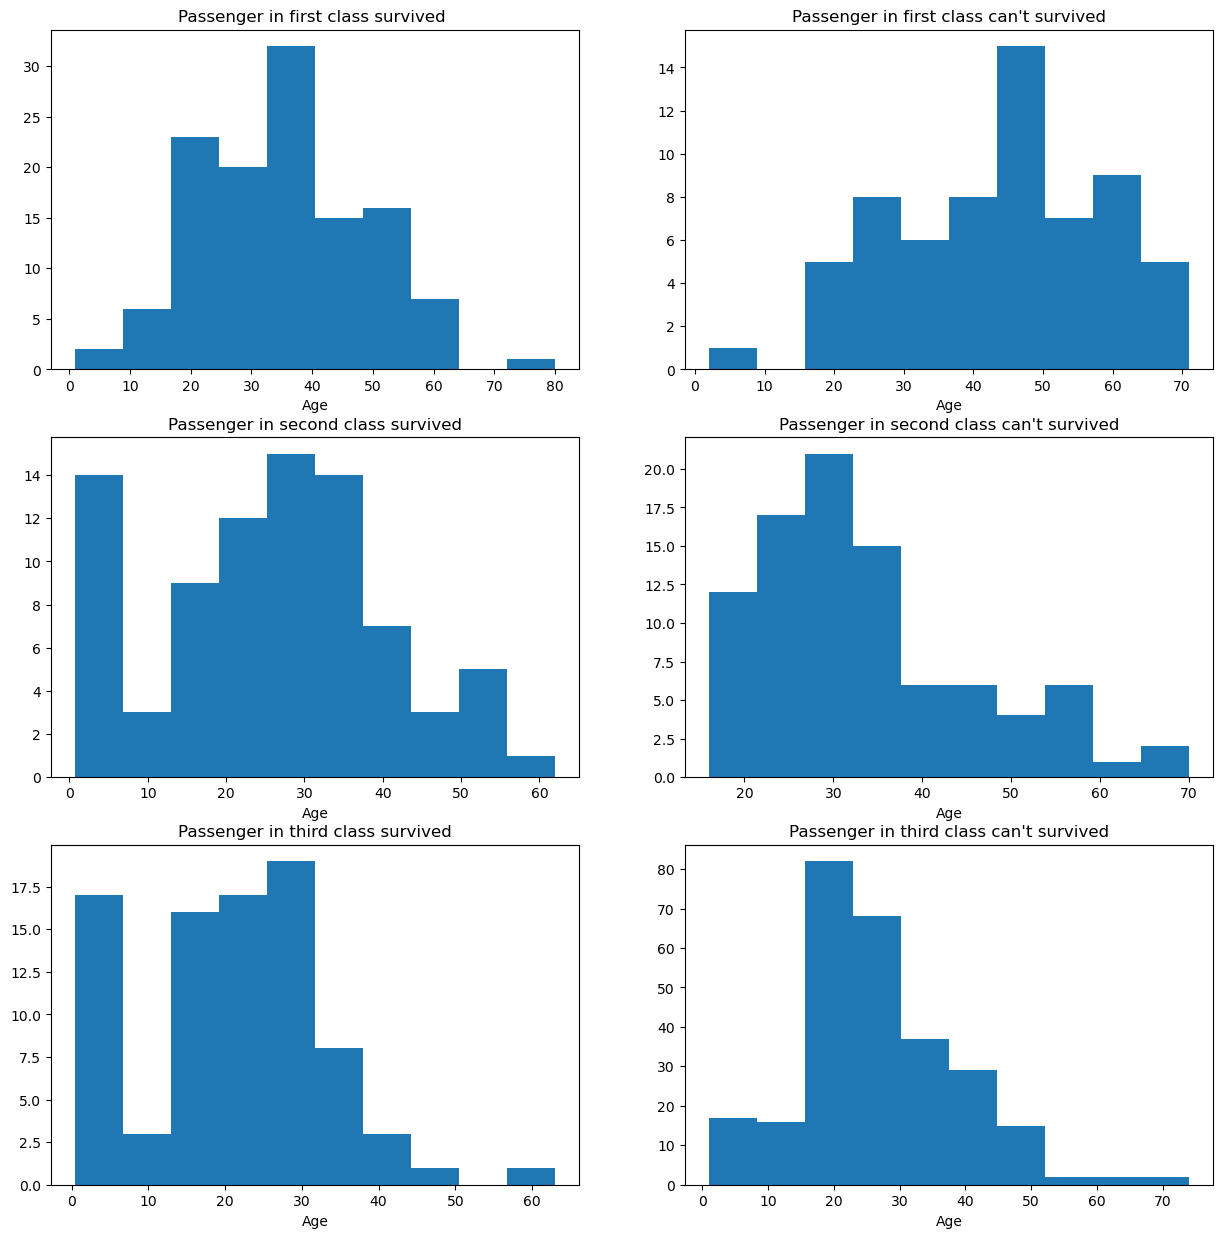

In [48]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize = (15,15))
hist1 = ax1.hist(df_train.Age[(df_train.Survived == 1) & (df_train.Pclass == 1)])
hist2 = ax2.hist(df_train.Age[(df_train.Survived == 0) & (df_train.Pclass == 1)])
hist3 = ax3.hist(df_train.Age[(df_train.Survived == 1) & (df_train.Pclass == 2)])
hist4 = ax4.hist(df_train.Age[(df_train.Survived == 0) & (df_train.Pclass == 2)])
hist5 = ax5.hist(df_train.Age[(df_train.Survived == 1) & (df_train.Pclass == 3)])
hist6 = ax6.hist(df_train.Age[(df_train.Survived == 0) & (df_train.Pclass == 3)])
ax1.set(title="Passenger in first class survived ",xlabel="Age")
ax2.set(title="Passenger in first class can't survived",xlabel="Age")
ax3.set(title="Passenger in second class survived",xlabel="Age")
ax4.set(title="Passenger in second class can't survived",xlabel="Age")
ax5.set(title="Passenger in third class survived",xlabel="Age")
ax6.set(title="Passenger in third class can't survived",xlabel="Age");

Here we can see even more clearly that age doesn't have a significant impact, but the highest class tickets indeed saved a considerable number of lives.

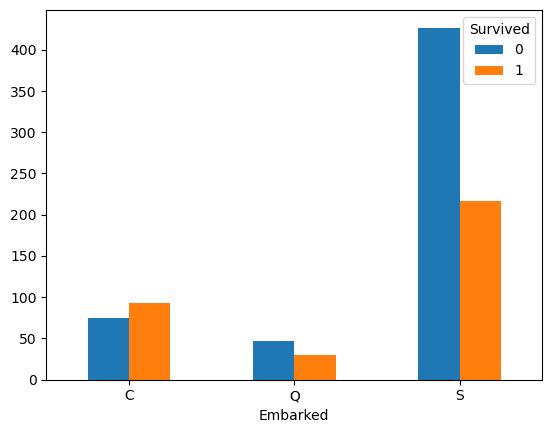

In [50]:
#Does the embarkation point have an impact on the passengers' survival chances? Let's check and see
pd.crosstab(df_train["Embarked"],df_train["Survived"]).plot(kind = 'bar')
plt.xticks(rotation = True);

Passengers from Southampton had the highest survival rate, but they also had the highest number of fatalities. Let's delve deeper into this.

C:\Users\lequa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lequa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


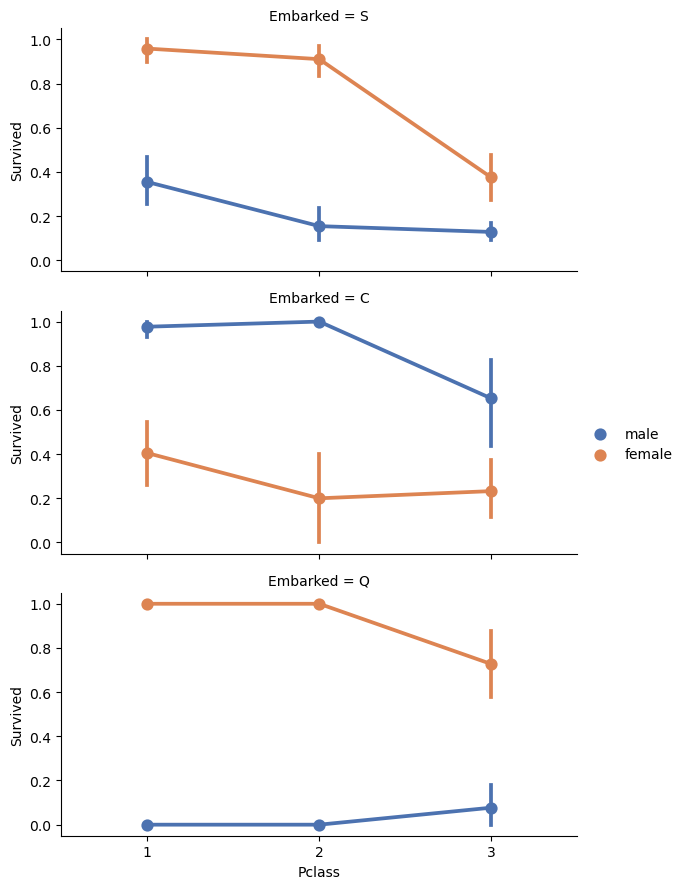

In [52]:
grid = sns.FacetGrid(df_train, row='Embarked', aspect=2.0)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\lequa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


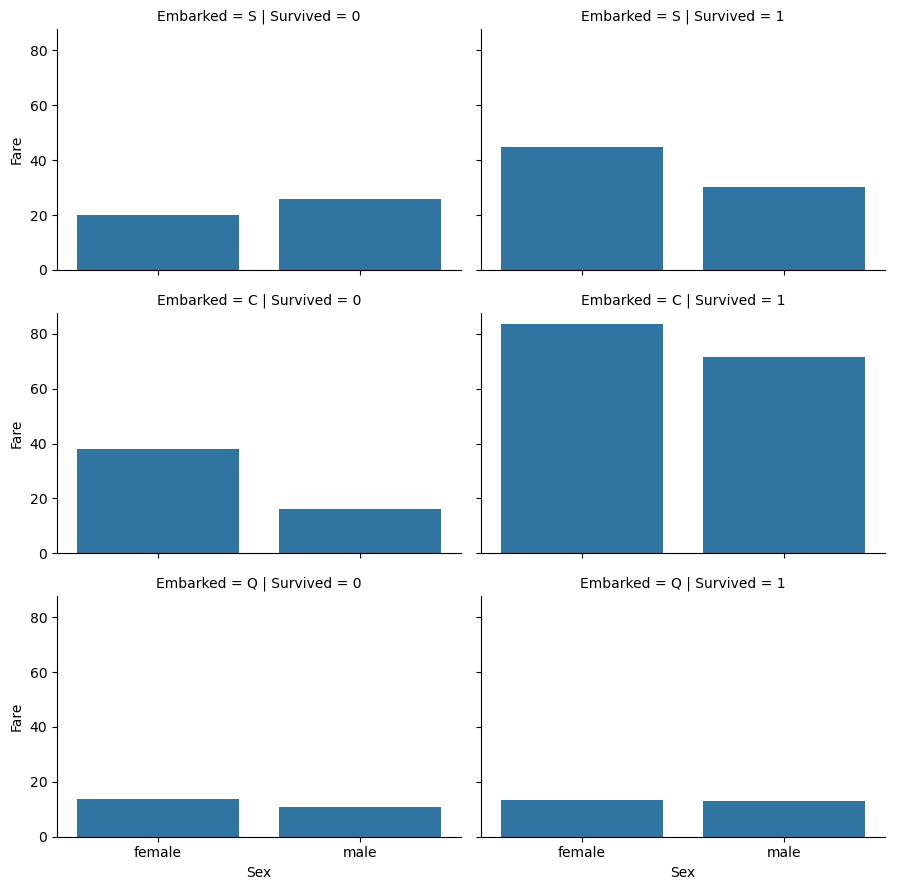

In [54]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', aspect=1.5)
grid.map(sns.barplot, 'Sex', 'Fare',errorbar=None)
grid.add_legend()

Once again, we see that first-class tickets saved many lives, and at port 'Cherbourg,' it's peculiar that the survival rate for males is higher than for females

# Feature Engineer
- Now that we have a basic understanding of this dataset, let's select and transform features from the raw data to improve the performance of the machine learning model we will build.

In [140]:
#Remove columns with mixed data types to avoid affecting the model training also doing preprocessing 
#data on this data type will cost alot of time 
df_train.drop(["Ticket","Cabin"],axis = 1,inplace = True)

In [56]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [116]:
df_test.drop(["Ticket","Cabin"],axis = 1,inplace = True)

In [58]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [141]:
#Turning name to category and save it to another columns 
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [61]:
df_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [142]:
#Simplify the title features
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

In [63]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [143]:
#Turn the title features to numeric
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_train["Title"] = df_train["Title"].map(title_mapping)

In [144]:
df_train.drop("Name",axis = 1,inplace = True)

In [117]:
#Let do the same step but on the test data
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [118]:
df_test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [119]:
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace(['Col','Rev','Dr','Dona'], 'Rare')

In [120]:
df_test["Title"].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [121]:
#Turn the title features to numeric
test_title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_test["Title"] = df_test["Title"].map(test_title_mapping)

In [122]:
df_test.drop("Name",axis = 1,inplace = True)

In [123]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


In [78]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,3
2,3,1,3,female,26.0,0,0,7.9250,S,2
3,4,1,1,female,35.0,1,0,53.1000,S,3
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [145]:
#Turning the sex to numeric 
sex_mapping = {'female': 1, 'male': 0}
df_train["Sex"] = df_train["Sex"].map(sex_mapping)


In [124]:
test_sex_mapping = {'female': 1, 'male': 0}
df_test["Sex"] = df_test["Sex"].map(test_sex_mapping)

In [81]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


In [82]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


In [83]:
#Don't forget we still have missing value let fill them on 
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
dtype: int64

In [125]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

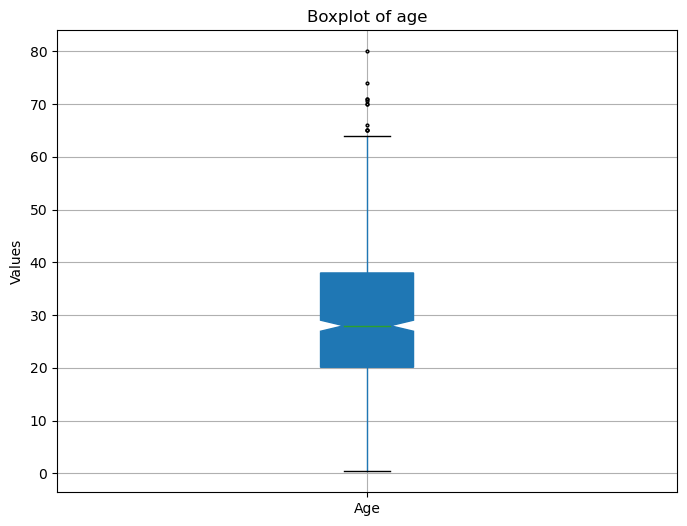

In [85]:
plt.figure(figsize=(8, 6))
df_train.boxplot(column='Age', patch_artist=True, notch=True, flierprops=dict(marker='o', markersize=2))
plt.ylabel('Values')
plt.title('Boxplot of age');

In [146]:
#I Will fill the null value in the age coloumn with median and also turn it into ordinal value
df_train["Age"].fillna(df_train["Age"].median(),inplace = True)

In [88]:
df_train["Age"].isnull().sum()

0

In [147]:
df_train["Age"] = df_train["Age"].astype(int)
df_train['AgeBand'] = pd.cut(df_train['Age'], 5) #Create new coloumn from the extract data from age column

In [148]:
df_train.loc[df_train['Age'] <= 16, 'Age'] = 1
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 32), 'Age'] = 2
df_train.loc[(df_train['Age'] > 32) & (df_train['Age'] <= 48), 'Age'] = 3
df_train.loc[(df_train['Age'] > 48) & (df_train['Age'] <= 64), 'Age'] = 4
df_train.loc[ df_train['Age'] > 64, 'Age'] = 5

In [93]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,0,2,1,0,7.2500,S,1,"(16.0, 32.0]"
1,2,1,1,1,3,1,0,71.2833,C,3,"(32.0, 48.0]"
2,3,1,3,1,2,0,0,7.9250,S,2,"(16.0, 32.0]"
3,4,1,1,1,3,1,0,53.1000,S,3,"(32.0, 48.0]"
4,5,0,3,0,3,0,0,8.0500,S,1,"(32.0, 48.0]"


In [126]:
#Do the same step with test dataset
df_test["Age"].fillna(df_test["Age"].median(),inplace = True)

In [127]:
df_test["Age"].isnull().sum()

0

In [128]:
df_test["Age"] = df_test["Age"].astype(int)
df_test['AgeBand'] = pd.cut(df_test['Age'], 5)

In [129]:
np.unique(df_test["AgeBand"])

array([Interval(-0.076, 15.2, closed='right'),
       Interval(15.2, 30.4, closed='right'),
       Interval(30.4, 45.6, closed='right'),
       Interval(45.6, 60.8, closed='right'),
       Interval(60.8, 76.0, closed='right')], dtype=object)

In [130]:
df_test.loc[df_test['Age'] <= 15.2, 'Age'] = 1
df_test.loc[(df_test['Age'] > 15.2) & (df_test['Age'] <= 30.4), 'Age'] = 2
df_test.loc[(df_test['Age'] > 30.4) & (df_test['Age'] <= 45.6), 'Age'] = 3
df_test.loc[(df_test['Age'] > 45.6) & (df_test['Age'] <= 60.8), 'Age'] = 4
df_test.loc[ df_test['Age'] > 60.8, 'Age'] = 5

In [99]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,892,3,0,3,0,0,7.8292,Q,1,"(30.4, 45.6]"
1,893,3,1,4,1,0,7.0000,S,3,"(45.6, 60.8]"
2,894,2,0,5,0,0,9.6875,Q,1,"(60.8, 76.0]"
3,895,3,0,2,0,0,8.6625,S,1,"(15.2, 30.4]"
4,896,3,1,2,1,1,12.2875,S,3,"(15.2, 30.4]"


In [101]:
#On to the fare feature
#Because the range of the fare is large so we can't create a fareband columns but i still create it just for consult purpose
fareband = pd.qcut(df_train['Fare'], 4)
fareband

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [102]:
np.unique(fareband)

array([Interval(-0.001, 7.91, closed='right'),
       Interval(7.91, 14.454, closed='right'),
       Interval(14.454, 31.0, closed='right'),
       Interval(31.0, 512.329, closed='right')], dtype=object)

In [149]:
#Turn the fare to ordinal value base on fareband
df_train.loc[ df_train['Fare'] <= 7.91, 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 7.91) & (df_train['Fare'] <= 14.454), 'Fare'] = 2
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 31), 'Fare']   = 3
df_train.loc[ df_train['Fare'] > 31, 'Fare'] = 4
df_train['Fare'] = df_train['Fare'].astype(int)

In [131]:
#Now we do the same step with the test data
test_fareband = pd.qcut(df_test['Fare'], 4)
test_fareband.value_counts()

(-0.001, 7.896]    114
(14.454, 31.5]     105
(31.5, 512.329]    102
(7.896, 14.454]     96
Name: Fare, dtype: int64

In [132]:
#The test data has one row with null value let fill this first
df_test["Fare"].fillna(df_test["Fare"].median(),inplace = True)

In [133]:
df_test.loc[ df_test['Fare'] <= 7.896, 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 7.896) & (df_test['Fare'] <= 14.454), 'Fare'] = 2
df_test.loc[(df_test['Fare'] > 14.454) & (df_test['Fare'] <= 31.5), 'Fare']   = 3
df_test.loc[ df_test['Fare'] > 31.5, 'Fare'] = 4
df_test['Fare'] = df_test['Fare'].astype(int)

In [134]:
df_test["Fare"].value_counts()

1    114
3    109
4    102
2     93
Name: Fare, dtype: int64

In [150]:
df_train["Embarked"].fillna('S',inplace =True)

In [151]:
#Turn Embarked to ordinal
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
df_train["Embarked"] = df_train["Embarked"].map(embarked_mapping)

In [153]:
test_embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
df_test["Embarked"] = df_test["Embarked"].map(test_embarked_mapping)

In [155]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,0,2,1,0,1,1,1,"(16.0, 32.0]"
1,2,1,1,1,3,1,0,4,2,3,"(32.0, 48.0]"
2,3,1,3,1,2,0,0,2,1,2,"(16.0, 32.0]"
3,4,1,1,1,3,1,0,4,1,3,"(32.0, 48.0]"
4,5,0,3,0,3,0,0,2,1,1,"(32.0, 48.0]"


In [156]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,892,3,0,3,0,0,1,3,1,"(30.4, 45.6]"
1,893,3,1,4,1,0,1,1,3,"(45.6, 60.8]"
2,894,2,0,5,0,0,2,3,1,"(60.8, 76.0]"
3,895,3,0,2,0,0,2,1,1,"(15.2, 30.4]"
4,896,3,1,2,1,1,2,1,3,"(15.2, 30.4]"


In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Age          891 non-null    int32   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    int32   
 8   Embarked     891 non-null    int64   
 9   Title        891 non-null    int64   
 10  AgeBand      891 non-null    category
dtypes: category(1), int32(2), int64(8)
memory usage: 63.9 KB


In [158]:
df_train.drop("PassengerId",axis = 1,inplace = True)

In [171]:
df_train.drop("AgeBand",axis = 1,inplace = True)

In [172]:
df_test.drop("AgeBand",axis = 1,inplace = True)

In [173]:
df_train.to_csv("Train_Preprocessed_final.csv",index = False)

In [174]:
df_test.to_csv("Test_Preprocessed_final.csv",index = False)

# Modeling

I use 4 model Logistic Regression and RandomForestClassifier, DecisionTreeClassifier,KNeighborsClassifier

In [175]:
#Create a train and valid set from df_train
from sklearn.model_selection import train_test_split
X = df_train.drop("Survived",axis = 1)
y = df_train["Survived"]
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [176]:
len(X_train),len(y_train),len(X_val),len(y_val)

(712, 712, 179, 179)

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [248]:
clf = RandomForestClassifier()
log_reg = LogisticRegression(solver='liblinear',C=0.23357214690901212)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [249]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [264]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [251]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [252]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [253]:
clf_preds = clf.predict(X_val)
log_reg_preds = log_reg.predict(X_val)
knn_preds = knn.predict(X_val)
tree_preds = tree.predict(X_val)

In [254]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metrics_dict ={"accuracy" : round(accuracy,2),
                  "precision" : round(precision,2),
                  "recall" : round(recall,2),
                  "f1" : round(f1,2)}
    
    return metrics_dict

In [255]:
clf_metrics = evaluate_preds(y_val,clf_preds)

In [265]:
log_reg_metrics = evaluate_preds(y_val,log_reg_preds)

In [257]:
knn_metrics = evaluate_preds(y_val,knn_preds)

In [258]:
tree_metrics = evaluate_preds(y_val,tree_preds)

In [259]:
clf_metrics

{'accuracy': 0.84, 'precision': 0.82, 'recall': 0.8, 'f1': 0.81}

In [266]:
log_reg_metrics

{'accuracy': 0.78, 'precision': 0.74, 'recall': 0.73, 'f1': 0.73}

In [261]:
knn_metrics

{'accuracy': 0.84, 'precision': 0.82, 'recall': 0.78, 'f1': 0.8}

In [262]:
tree_metrics

{'accuracy': 0.83, 'precision': 0.79, 'recall': 0.78, 'f1': 0.79}

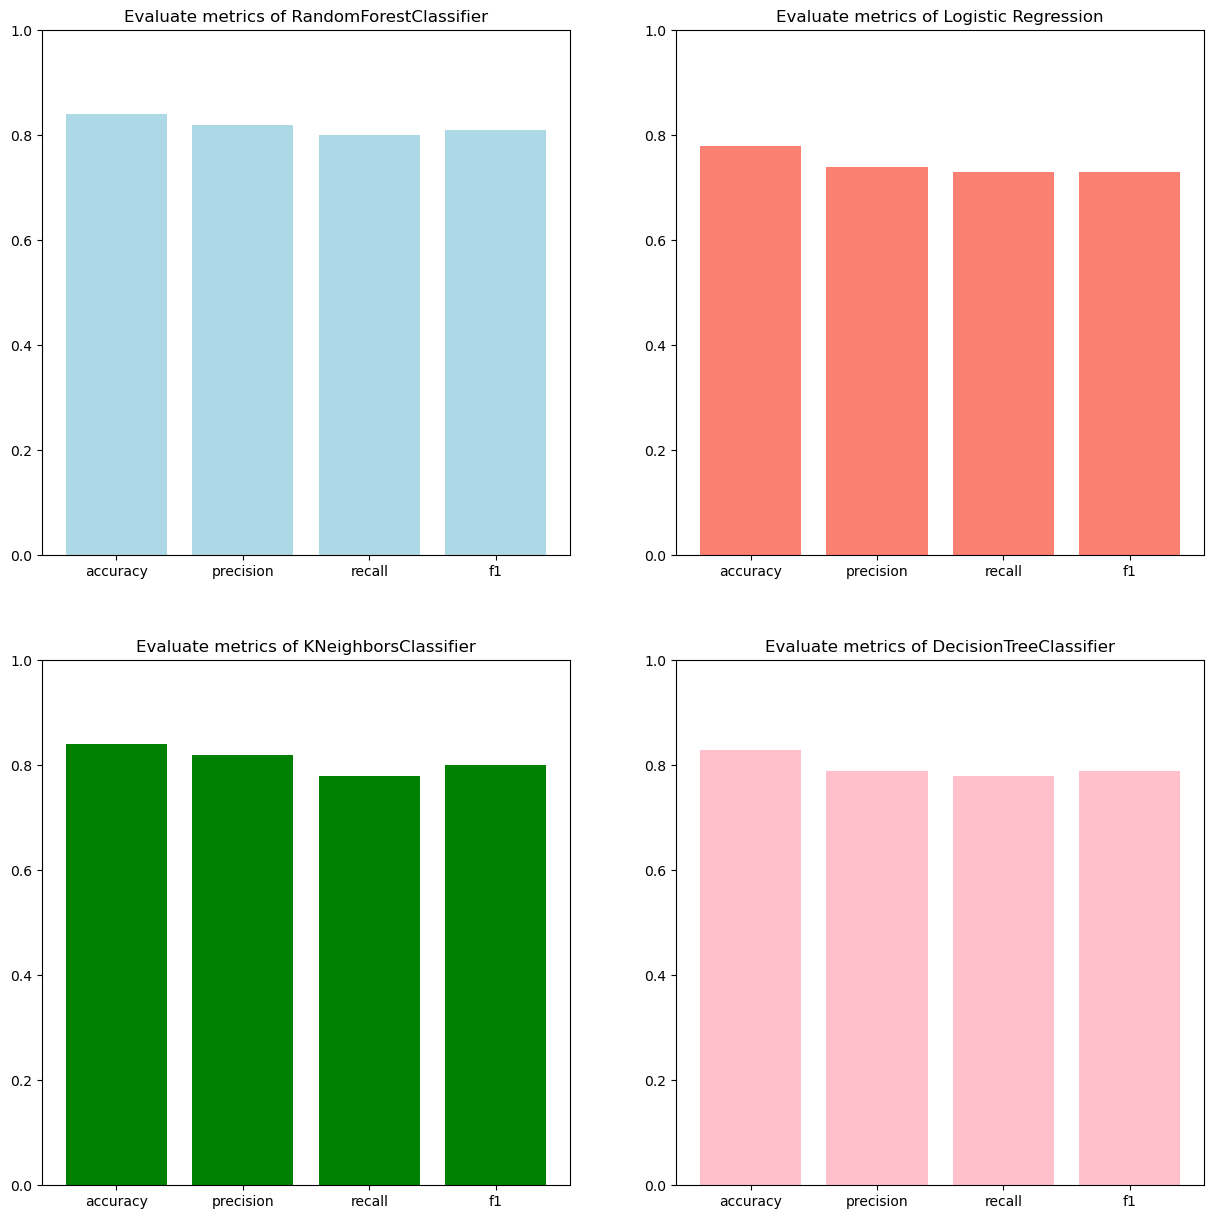

In [263]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize = (15,15))
rclf_plot = ax1.bar(clf_metrics.keys(),clf_metrics.values(),color = "lightblue")
log_reg_plot = ax2.bar(log_reg_metrics.keys(),log_reg_metrics.values(),color = "salmon")
knn_plot = ax3.bar(knn_metrics.keys(),knn_metrics.values(),color = "green")
tree_plot = ax4.bar(tree_metrics.keys(),tree_metrics.values(),color = "pink")
ax1.set(title="Evaluate metrics of RandomForestClassifier",ylim=[0,1])
ax2.set(title="Evaluate metrics of Logistic Regression",ylim=[0,1]);
ax3.set(title="Evaluate metrics of KNeighborsClassifier",ylim=[0,1]);
ax4.set(title="Evaluate metrics of DecisionTreeClassifier",ylim=[0,1]);

In [267]:
#Create X_test from test data
X_test  = df_test.drop("PassengerId", axis=1)

In [268]:
#Use the best model to predict on X_test
y_pred = clf.predict(X_test)

In [272]:
#Create kaggle submission
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv("submission.csv",index = False)